# bu project mijozlarning ma'lumotlariga qarab kredit berish kerakmi yoki yoq.shu haqida
# target - Personal Loan

In [2]:
import pandas as pd 
df=pd.read_csv('C:/Users/xolmu/OneDrive/Desktop/project_007/Data/Raw_data/UniversalBank.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree

In [15]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [17]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

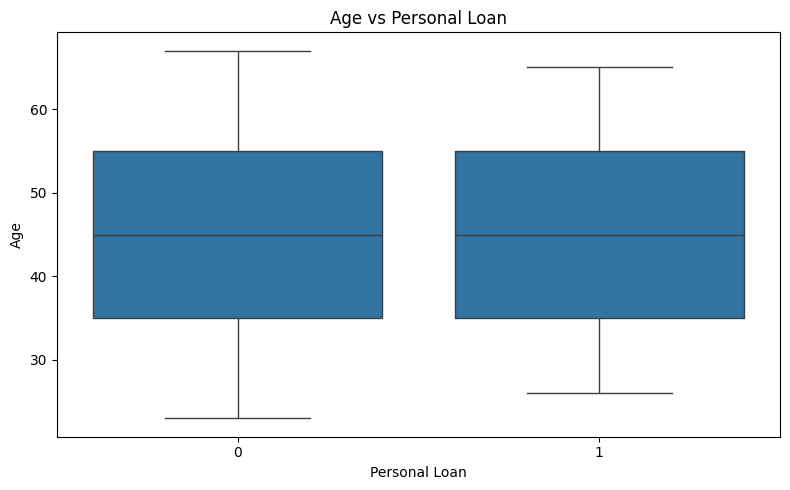

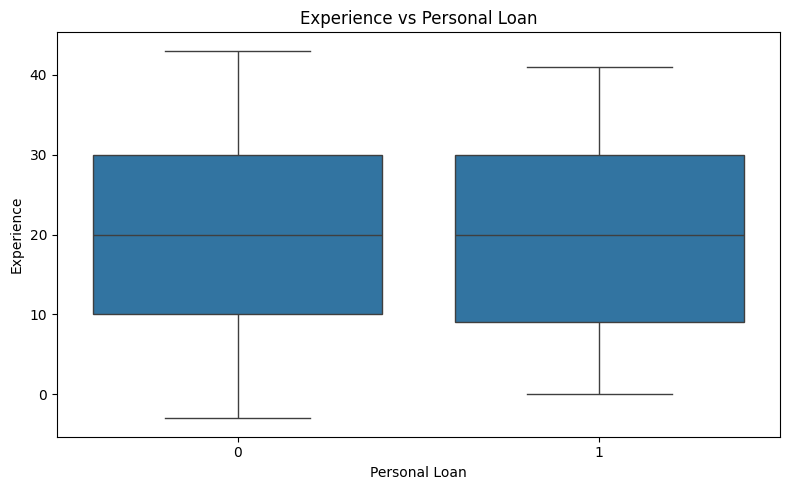

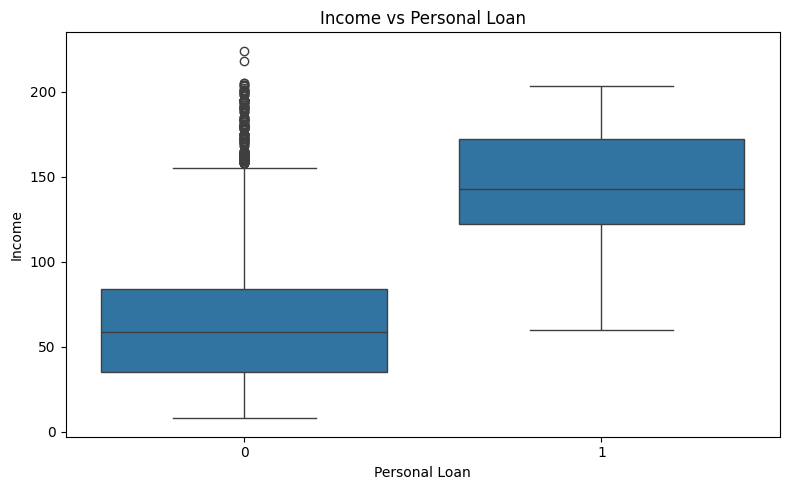

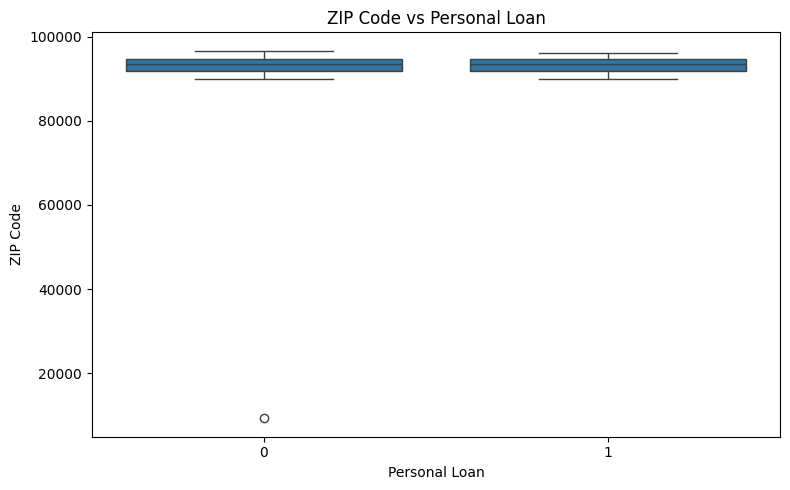

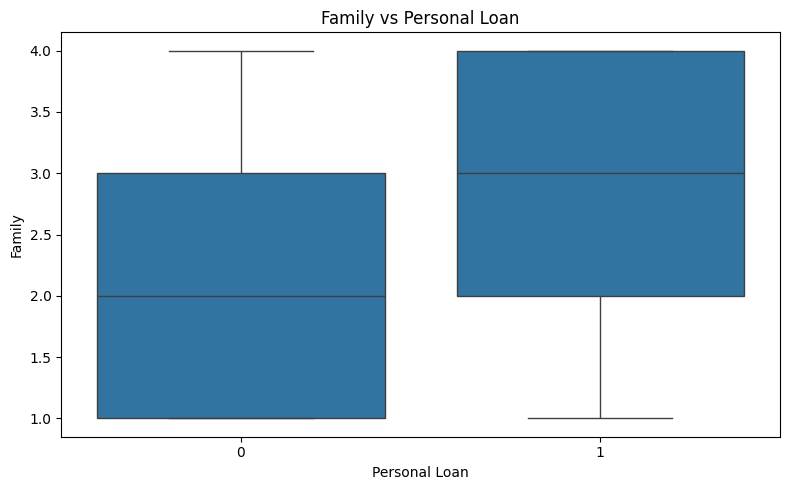

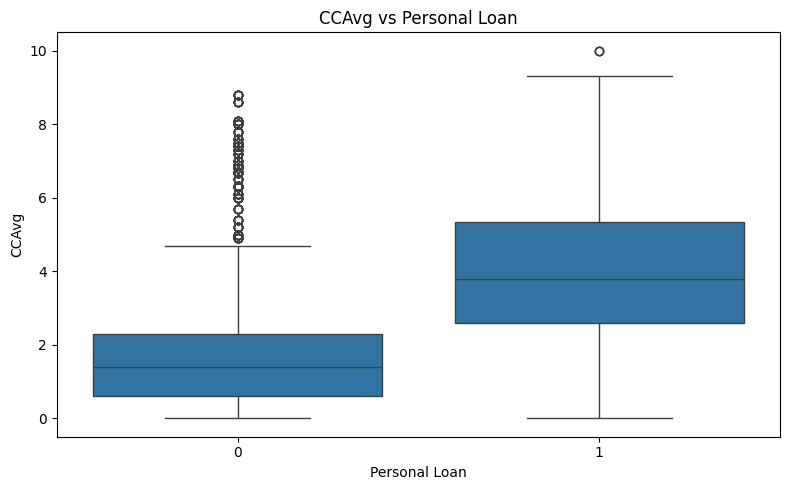

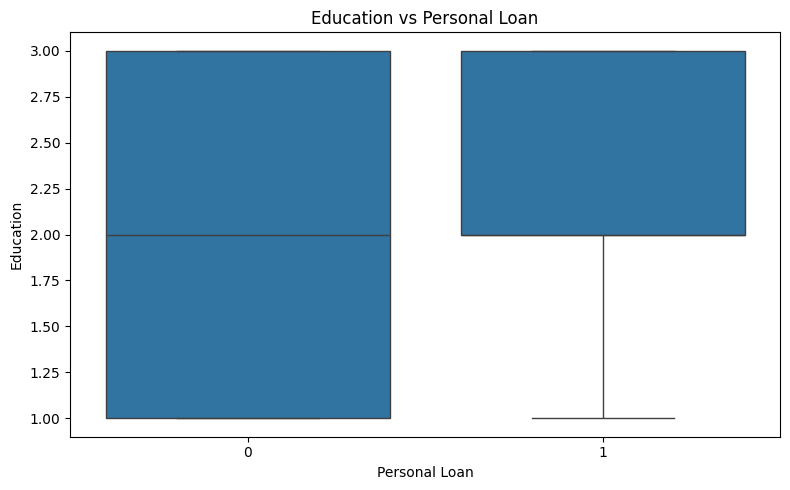

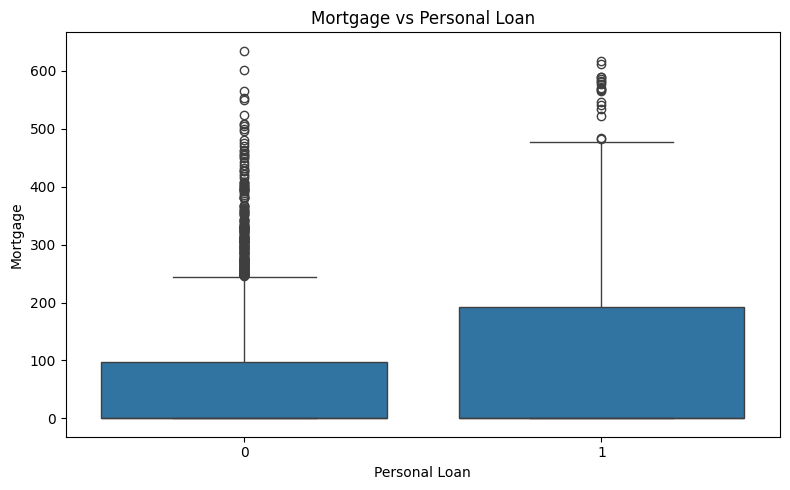

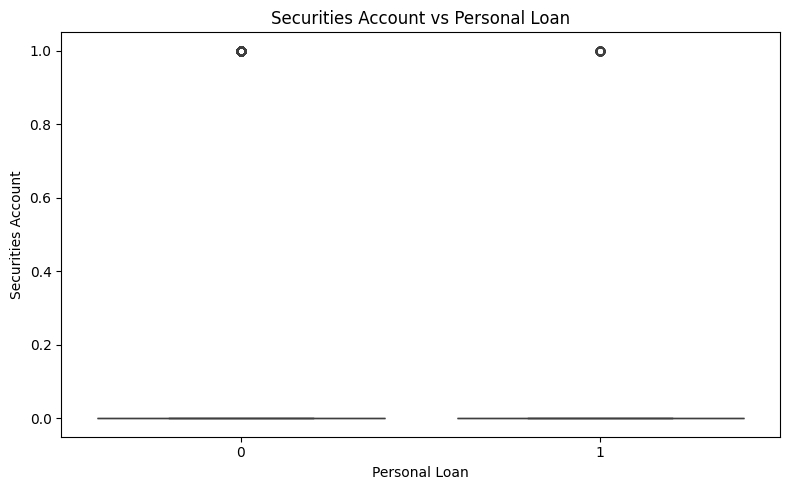

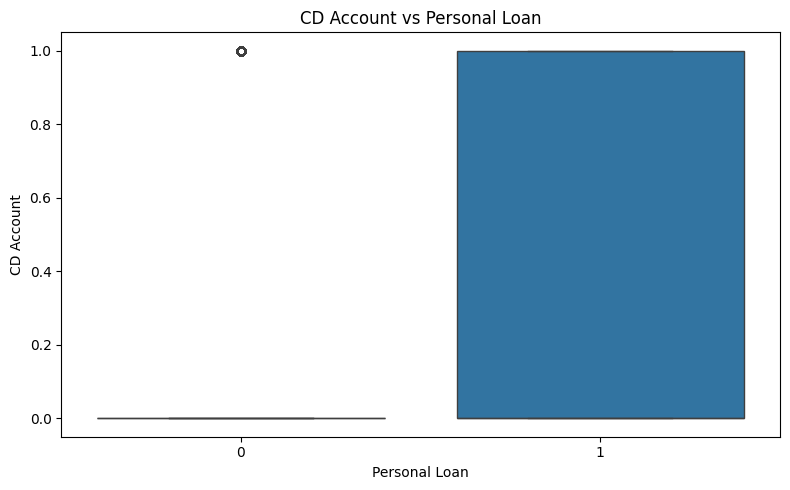

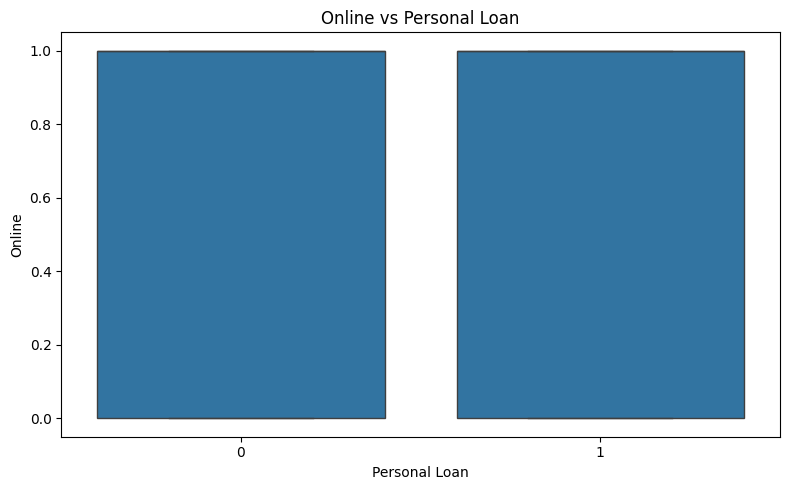

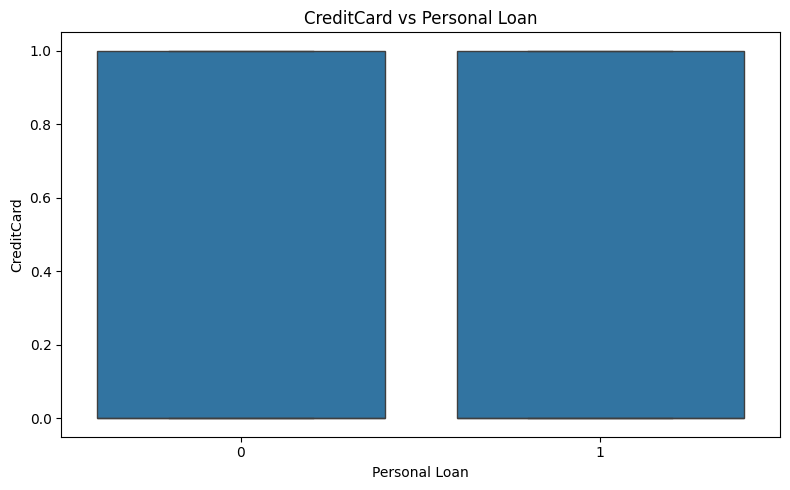

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Saqlash papkasini yaratib olish
os.makedirs("../visualisations", exist_ok=True)

target = "Personal Loan"
features = [col for col in df.columns if col != target and col != "ID"]

for col in features:
    plt.figure(figsize=(8,5))
    
    if df[col].dtype in ["int64", "float64"]:  # Sonli ustunlar
        sns.boxplot(x=target, y=col, data=df)
    else:  # Kategorik ustunlar
        sns.countplot(x=col, hue=target, data=df)
    
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    
    # Har bir ustun uchun alohida nom bilan saqlash
    filename = f"../visualisations/{col}_vs_{target}.png"
    plt.savefig(filename)
    plt.close()  # Har grafikdan keyin RAMni tozalash

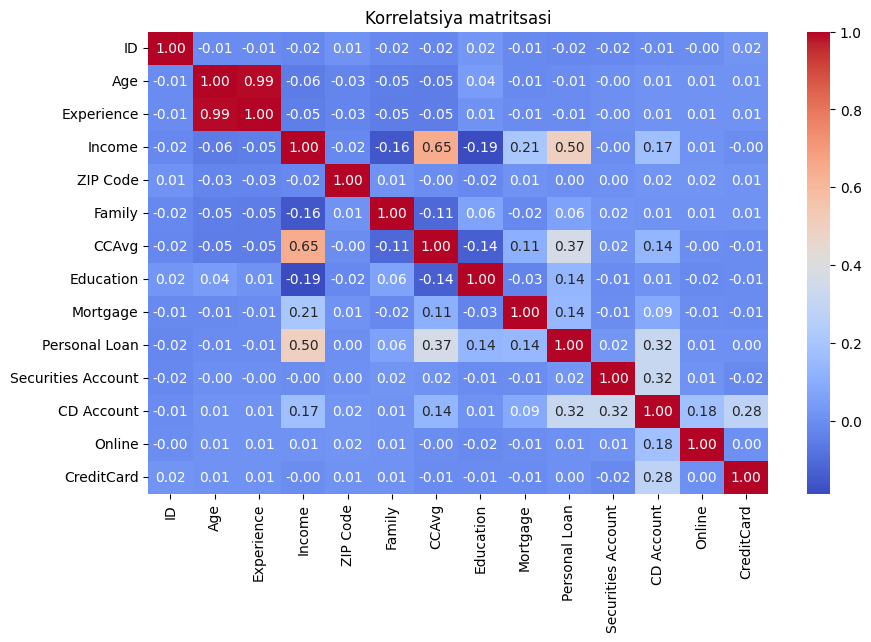

In [48]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelatsiya matritsasi")
plt.savefig('../visualisations/Barcha ustunlarning targetga bogliqligini heat mapda korinishi.png')
plt.show()

In [ ]:
# barcha bogliq ustunlarni aniqlash uchun feature importance (RandomForest bilan) ham korish

               Feature  Importance
2               Income    0.338067
6            Education    0.195352
5                CCAvg    0.158707
4               Family    0.114449
9           CD Account    0.048891
0                  Age    0.034159
3             ZIP Code    0.032299
1           Experience    0.031041
7             Mortgage    0.029645
11          CreditCard    0.007823
10              Online    0.006197
8   Securities Account    0.003371


C:\Users\xolmu\AppData\Local\Temp\ipykernel_22768\2221891457.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




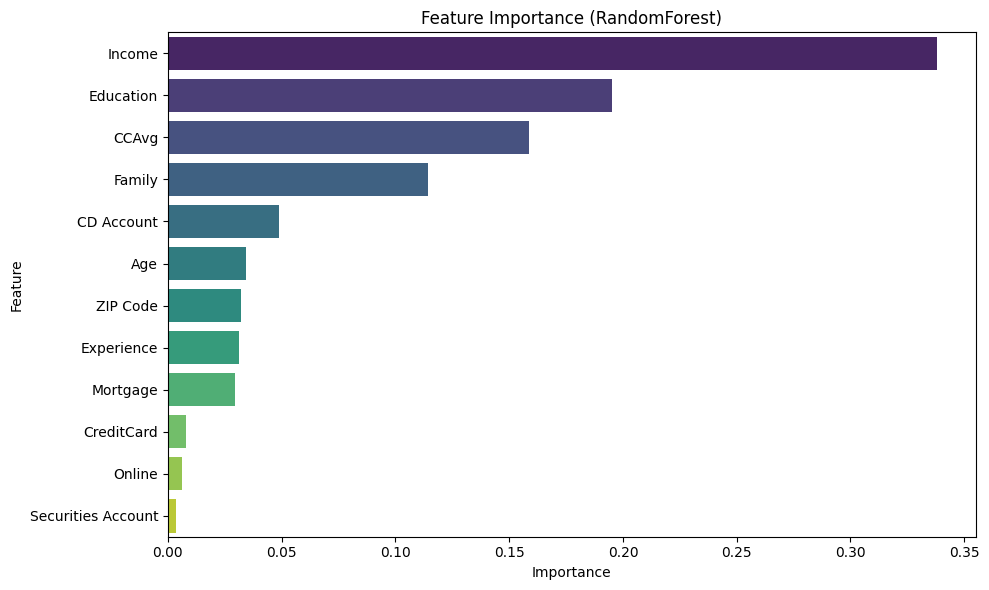

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# X va y ni ajratamiz
X = df.drop(columns=["Personal Loan", "ID"])  # target va ID ni olib tashlaymiz
y = df["Personal Loan"]

# RandomForest modelini qurish
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

# Feature importance qiymatlari
importances = model.feature_importances_
features = X.columns

# DataFrame ko‘rinishida chiqaramiz
feat_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_importance_df)

# Vizualizatsiya
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.savefig("../visualisations/Feature_Importance_RandomForest.png")
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Preprocessing

In [20]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class Datapreprocessing:
    def __init__(self, df):
        # Asl dataset o‘zgarmasligi uchun nusxa olamiz
        self.df = df.copy()
    
    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                else:
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
        return self
    
    def encodla(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                encoder = LabelEncoder()   # har bir ustun uchun alohida encoder
                self.df[col] = encoder.fit_transform(self.df[col].astype(str))
        return self
    
    def scale_qil(self, scaler=None):
        if scaler is None:
            scaler = MinMaxScaler()   # default: MinMax
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop('Personal Loan', errors='ignore')
        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])
        return self
    
    def get_data(self):
        return self.df

In [21]:
# Preprocessing pipeline
dp = Datapreprocessing(df)
df = dp.tozala().encodla().scale_qil().get_data()
print(new_df.head())

       ID       Age  Experience    Income  ZIP Code    Family  CCAvg  \
0  0.0000  0.045455    0.086957  0.189815  0.936527  1.000000   0.16   
1  0.0002  0.500000    0.478261  0.120370  0.924872  0.666667   0.15   
2  0.0004  0.363636    0.391304  0.013889  0.977892  0.000000   0.10   
3  0.0006  0.272727    0.260870  0.425926  0.970931  0.000000   0.27   
4  0.0008  0.272727    0.239130  0.171296  0.939080  1.000000   0.10   

   Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0        0.0       0.0              0                 1.0         0.0     0.0   
1        0.0       0.0              0                 1.0         0.0     0.0   
2        0.0       0.0              0                 0.0         0.0     0.0   
3        0.5       0.0              0                 0.0         0.0     0.0   
4        0.5       0.0              0                 0.0         0.0     0.0   

   CreditCard  
0         0.0  
1         0.0  
2         0.0  
3         0.0  


In [17]:
df=new_df

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   float64
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   float64
 5   Family              5000 non-null   float64
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   float64
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   float64
 11  CD Account          5000 non-null   float64
 12  Online              5000 non-null   float64
 13  CreditCard          5000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 547.0 KB


In [3]:
import os

output_folder='Data/Preprocessed_data'    #preproceseed bolgan dataset boradigan papka manzili
os.makedirs(output_folder,exist_ok=True)
output_path=os.path.join(output_folder,'Preprocessed_data.csv')
df.to_csv(output_path,index=False)  # Tayyorlangan datasetni saqlash
print(f"Universal_Bank_data_preprocessed saved to : {output_path}")

Universal_Bank_data_preprocessed saved to : Data/Preprocessed_data\Preprocessed_data.csv
